# Poblem Statement 1:

Let's read data for analysis

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import os

In [6]:
os.listdir(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [7]:
pd.read_csv(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets\uber-raw-data-janjune-15_sample.csv")

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [8]:
uber_15= pd.read_csv(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets\uber-raw-data-janjune-15_sample.csv")

In [9]:
uber_15.shape

(100000, 4)

# Poblem Statement 2:

Let's perform pre-processing/ Data Cleaning

In this step we are trying to transform our data into acceptable form

In [10]:
type(uber_15)

pandas.core.frame.DataFrame

In [11]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [12]:
uber_15.duplicated().sum()

54

In [13]:
#let's remove duplicate values from our data.
uber_15.drop_duplicates(inplace= True)

In [14]:
uber_15.duplicated().sum() #no duplicates found

0

In [15]:
#the length of our data has changed to 99946
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 99946, dtype: bool

In [16]:
uber_15.shape

(99946, 4)

In [17]:
#let's check data types in our data

uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

The above output is telling us that the dispatching base num, pickup date and affiliated base num has a data type of object(string) and location id has a data type of integer

In [18]:
#let's check if there are any missing values in between our data

uber_15.isnull()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [19]:
#how many values are missing?

uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [20]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [21]:
#how can pick up date is of object (string) type. It should be of date-time type
#let's target our pick up dates

uber_15["Pickup_date"]

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
99995    2015-04-13 16:12:00
99996    2015-03-06 21:32:00
99997    2015-03-19 19:56:00
99998    2015-05-02 16:02:00
99999    2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: object

In [22]:
uber_15["Pickup_date"][0]

'2015-05-02 21:43:00'

In [23]:
type(uber_15["Pickup_date"][0])

str

In [24]:
#let's convert our pickup date into datetime

pd.to_datetime(uber_15["Pickup_date"])

0       2015-05-02 21:43:00
1       2015-01-20 19:52:59
2       2015-03-19 20:26:00
3       2015-04-10 17:38:00
4       2015-03-23 07:03:00
                ...        
99995   2015-04-13 16:12:00
99996   2015-03-06 21:32:00
99997   2015-03-19 19:56:00
99998   2015-05-02 16:02:00
99999   2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: datetime64[ns]

In [25]:
#let's set our new pickup date object type to datetime type

uber_15["Pickup_date"]= pd.to_datetime(uber_15["Pickup_date"])

In [26]:
#now check what is the object type of uber_15["Pickup_date"]

uber_15["Pickup_date"].dtype



dtype('<M8[ns]')

In [27]:
#now if we check the value of 

uber_15["Pickup_date"][0]

Timestamp('2015-05-02 21:43:00')

In [28]:
#let's check it's type

type(uber_15["Pickup_date"][0])

#it says that it belongs to timestamp nature whereas earlier it was of string nature

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

# Problem Statement 3:

Which months have maximum Uber pickups?

In [30]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [31]:
#from the given data we don't have month specified. but from our pickup date we can extract our month feature

uber_15["Pickup_date"]

0       2015-05-02 21:43:00
1       2015-01-20 19:52:59
2       2015-03-19 20:26:00
3       2015-04-10 17:38:00
4       2015-03-23 07:03:00
                ...        
99995   2015-04-13 16:12:00
99996   2015-03-06 21:32:00
99997   2015-03-19 19:56:00
99998   2015-05-02 16:02:00
99999   2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: datetime64[ns]

In [32]:
uber_15["Pickup_date"].dt.month

#the above code will return us months in numbers

0        5
1        1
2        3
3        4
4        3
        ..
99995    4
99996    3
99997    3
99998    5
99999    6
Name: Pickup_date, Length: 99946, dtype: int32

In [33]:
#let's get names of our months

uber_15["Pickup_date"].dt.month_name()

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: Pickup_date, Length: 99946, dtype: object

In [34]:
#let's store it in our month feature

uber_15["month"]= uber_15["Pickup_date"].dt.month_name()

In [35]:
uber_15["month"]

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

In [36]:
uber_15["month"].value_counts() #let's count 

month
June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: count, dtype: int64

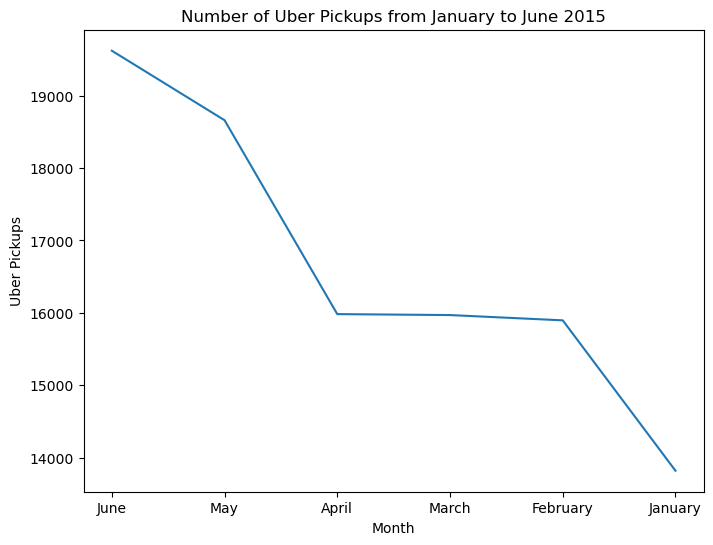

In [37]:
#let's execute our findings in a plot

plt.figure(figsize=(8, 6))
uber_15["month"].value_counts().plot()
plt.title("Number of Uber Pickups from January to June 2015")
plt.ylabel("Uber Pickups")
plt.xlabel("Month")
plt.show()

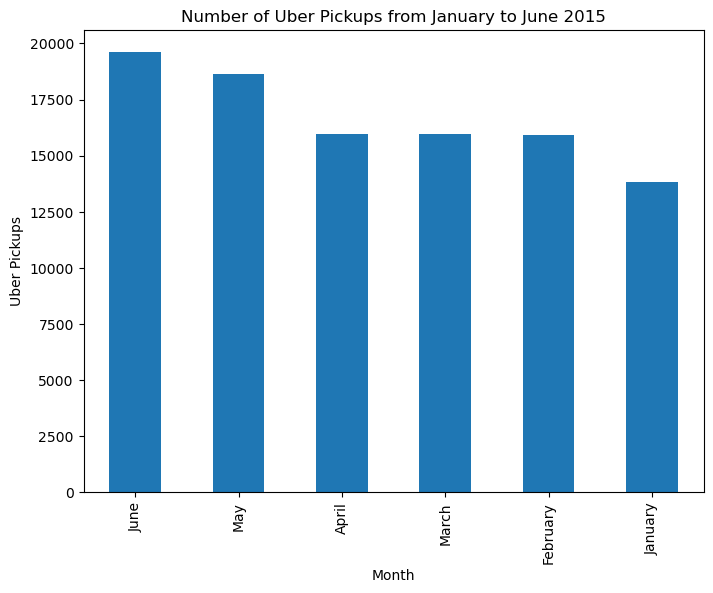

In [38]:
#if we need a bar plot then:

plt.figure(figsize=(8, 6))
uber_15["month"].value_counts().plot(kind= 'bar')
plt.title("Number of Uber Pickups from January to June 2015")
plt.ylabel("Uber Pickups")
plt.xlabel("Month")
plt.show()

In [39]:
#similar to our month feature we can also extract day, hour, minute, second etc from our pickup date

uber_15["Pickup_date"].dt.day_name()

0         Saturday
1          Tuesday
2         Thursday
3           Friday
4           Monday
           ...    
99995       Monday
99996       Friday
99997     Thursday
99998     Saturday
99999    Wednesday
Name: Pickup_date, Length: 99946, dtype: object

In [40]:
uber_15["weekday"]= uber_15["Pickup_date"].dt.day_name()
uber_15["day"]= uber_15["Pickup_date"].dt.day
uber_15["hour"]= uber_15["Pickup_date"].dt.hour
uber_15["minute"]= uber_15["Pickup_date"].dt.minute

In [41]:
uber_15.head(5)

#if we now check fist 5 lines of our data we find out that our data has now additional attributes

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23,7,3


In [42]:
#let's organise our month, weekday in a pivot table

pd.crosstab(index= uber_15["month"], columns= uber_15["weekday"])

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [43]:
#let's store it in a variable "pivot"

pivot= pd.crosstab(index= uber_15["month"], columns= uber_15["weekday"])

<Axes: xlabel='month'>

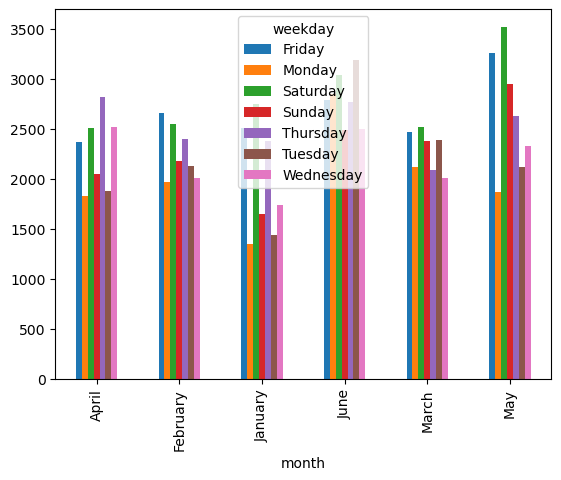

In [44]:
pivot.plot(kind= "bar")

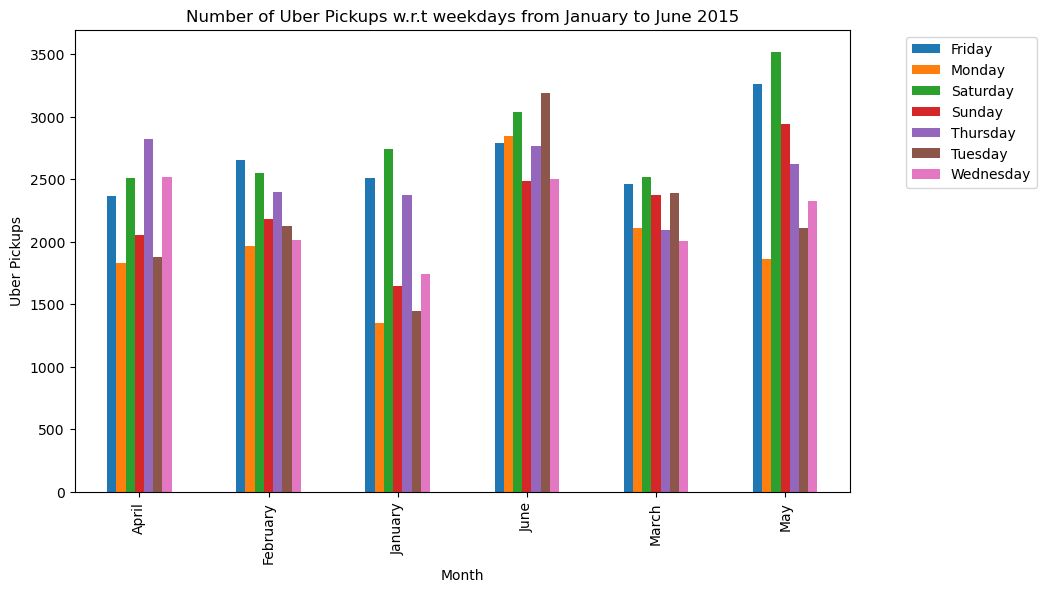

In [45]:
#the baove is a default group bar chart. let's change the figure size

pivot.plot(kind= "bar", figsize= (10,6))
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylabel("Uber Pickups")
plt.xlabel("Month")
plt.title("Number of Uber Pickups w.r.t weekdays from January to June 2015")
plt.show()

# Problem Statement 4:

Let's find our Hourly rush in Newyork city on all days

In [46]:
#In order to find out the hourly rush on different weekdays, we need to comeup with a data frame which mentions
#weekdays, hour of that week day, and number of orders per hour on that weekday


#Once I have all these details I can then compile that data in a group which will show the total number of orders 
#in that particular hour of all fridays(weekday). Once I have that information I can simply convertit into plot


uber_15.groupby(["weekday", "hour"])

In [47]:
#find out the size of this data
uber_15.groupby(["weekday", "hour"]).size()

weekday    hour
Friday     0        581
           1        333
           2        197
           3        138
           4        161
                   ... 
Wednesday  19      1044
           20       897
           21       949
           22       900
           23       669
Length: 168, dtype: int64

In [48]:
#convert into dataframe

uber_15.groupby(["weekday", "hour"], as_index= False).size()

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


In [49]:
summary= uber_15.groupby(["weekday", "hour"], as_index= False).size()

In [50]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<Axes: xlabel='hour', ylabel='size'>

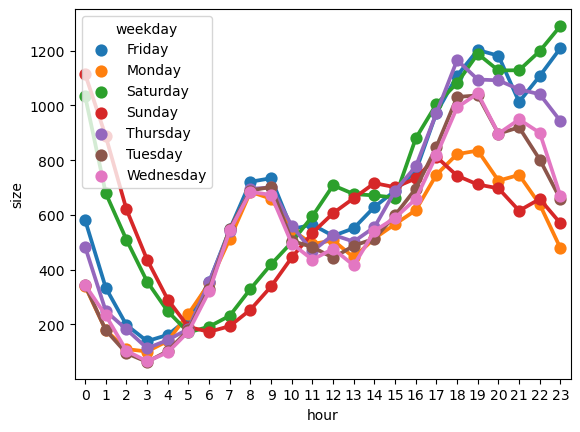

In [51]:
#let's build the plot

sns.pointplot(x= "hour", y= "size", hue= "weekday", data= summary)

Text(0.5, 1.0, 'Hourly Rush in New York City in Weekdays')

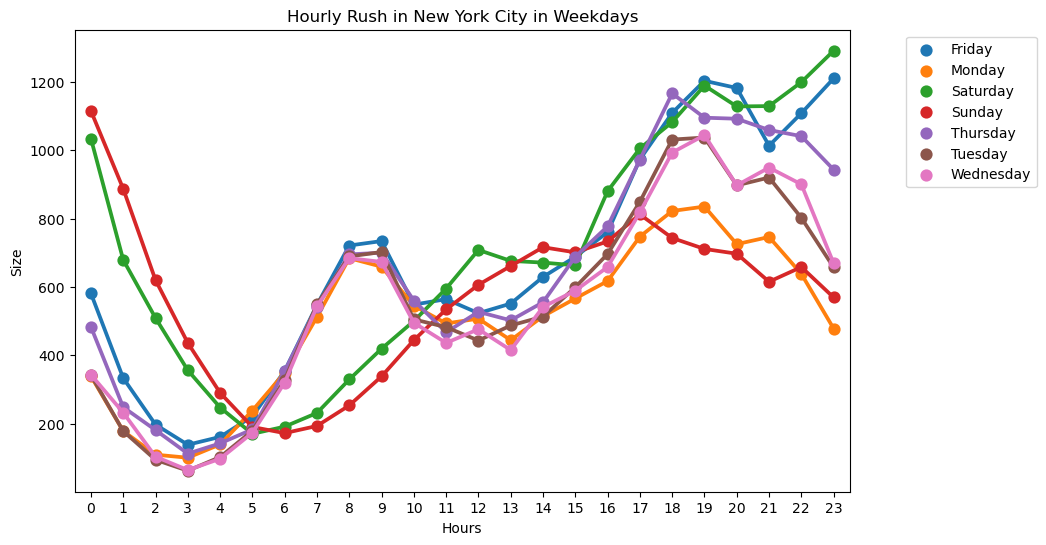

In [52]:
#let's customize our point plot using matplotlib

plt.figure(figsize= (10,6))


sns.pointplot(x= "hour", y= "size", hue= "weekday", data= summary)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylabel("Size")
plt.xlabel("Hours")
plt.title("Hourly Rush in New York City in Weekdays")

# Problem Statement 5:

Which Base_number has most number of active vehicles?

In order to get outcome for the above problem statement we first need to have data of base_numbers (which we have in the uber-raw-data-janjune-15_sample.csv file) and active vehicles(which is not in this file). Therefore, we will use Uber-Jan-Feb-FOIL file.

In [53]:
os.listdir(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [54]:
pd.read_csv(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets\Uber-Jan-Feb-FOIL.csv")

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [55]:
uber_foil= pd.read_csv(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets\Uber-Jan-Feb-FOIL.csv")

In [56]:
uber_foil.shape

(354, 4)

In [57]:
uber_foil.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


Although the problem statement says to show which base number has most active vehicles and that's what we are going to show but we will also show distribution which means for example if B1 is the base number we will show the minimum number of vehicles for this base number, as well as 25th percentile value, 50th (median) percentile value, 75th percentile value and maximum number of vehicles for this base number. This is also known as 5 point summary. For this purpose we will use "Box-plot"

Percentile meaning:

let's say the 25th percentile value of dataset [3,5,7,9,11,16 ----- 1000] is number 61 then that means:

there are 25% data points before 61
or 75% data points after 61

In order to develop boxplot of the above dataframe we will need to install different packages

In [58]:
!pip install chart_studio

In [59]:
!pip install plotly

In [60]:
import chart_studio.plotly as py
import plotly.graph_objs as goal
import plotly.express as px

In [61]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [62]:
#init_notebook_mode help enable Plotly's interactive capabilities within the notebook. 
#It sets up the notebook environment to display Plotly plots interactively

init_notebook_mode(connected= True)

In [63]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [64]:
fig= px.box(x= "dispatching_base_number", y= "active_vehicles", data_frame= uber_foil)


fig.update_xaxes(title_text="Dispatching Base Number")

fig.update_yaxes(title_text="Number of Active Vehicles")

fig.update_layout(title_text="Box Plot of Active Vehicles by Dispatching Base Number")

fig.show()

In the above box plot, if we hover over box, it will show 5 points. q1 is 25th percentile, q2 is median and q3 is 75th percentile

In [65]:
#similarly we can also create violin plot

fig2= px.violin(x= "dispatching_base_number", y= "active_vehicles", data_frame= uber_foil)

fig2.update_xaxes(title_text="Dispatching Base Number")

fig2.update_yaxes(title_text="Number of Active Vehicles")

fig2.update_layout(title_text="Violin Plot of Active Vehicles by Dispatching Base Number")

fig2.show()

# Problem Statement 6:

Collect entire data and make it ready for data analysis

In [66]:
os.listdir(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [67]:
os.listdir(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets")[-8:]

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [68]:
files= os.listdir(r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets")[-8:]

In [69]:
files.remove("uber-raw-data-janjune-15.csv")

In [70]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [71]:
files.remove("uber-raw-data-janjune-15_sample.csv")

In [72]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [73]:
final_data= pd.DataFrame()

path= r"C:\Users\sidra\Documents\Python\Data Analysis of Uber\UBER\Datasets-20230929T112948Z-001\Datasets"

for file in files:
    current_data_frame= pd.read_csv(path + "/" + file)
    final_data= pd.concat([current_data_frame, final_data])

In [74]:
final_data.shape

(4534327, 4)

In [75]:
final_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
564511    False
564512    False
564513    False
564514    False
564515    False
Length: 4534327, dtype: bool

In [76]:
final_data.duplicated().sum()

82581

In [77]:
final_data.drop_duplicates(inplace= True)

In [78]:
final_data.shape

(4451746, 4)

In [79]:
final_data.head(4)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512


# Problem Statement 7:

At which locations of Newyork City we are getting rush?

In order to solve this problem statement we basically need 3 information sets. 1. Longitute, 2. Latitute 3. Count

To rephrase our problem statement: At a given latitute and longitute what is the count/number of uber pickups


In [80]:
final_data.groupby(["Lat", "Lon"], as_index= False).sum()

,Lat,Lon,Date/Time,Base
0,39.6569,-74.2258,8/1/2014 19:32:00,B02598
1,39.6686,-74.1607,8/23/2014 13:35:00,B02682
2,39.7214,-74.2446,7/12/2014 14:16:00,B02617
3,39.8416,-74.1512,7/19/2014 22:21:00,B02617
4,39.9055,-74.0791,7/12/2014 22:49:00,B02512
...,...,...,...,...
574553,41.3730,-72.9237,4/28/2014 5:49:00,B02512
574554,41.3737,-73.7988,4/8/2014 16:34:00,B02682
574555,41.5016,-72.8987,4/25/2014 14:54:00,B02682
574556,41.5276,-72.7734,4/25/2014 10:49:00,B02682


In [81]:
uber_rush= final_data.groupby(["Lat", "Lon"], as_index= False).sum()

uber_rush


,Lat,Lon,Date/Time,Base
0,39.6569,-74.2258,8/1/2014 19:32:00,B02598
1,39.6686,-74.1607,8/23/2014 13:35:00,B02682
2,39.7214,-74.2446,7/12/2014 14:16:00,B02617
3,39.8416,-74.1512,7/19/2014 22:21:00,B02617
4,39.9055,-74.0791,7/12/2014 22:49:00,B02512
...,...,...,...,...
574553,41.3730,-72.9237,4/28/2014 5:49:00,B02512
574554,41.3737,-73.7988,4/8/2014 16:34:00,B02682
574555,41.5016,-72.8987,4/25/2014 14:54:00,B02682
574556,41.5276,-72.7734,4/25/2014 10:49:00,B02682


In [82]:
#to execute our analysis we will be using heat map.

#to create a heat map of a particular region, we can simply create a base map of whole world 
#and then add heat map on that base map

In [83]:
!pip install folium

In [84]:
import folium

In [85]:
folium.Map(location=[40.7128, -74.0060], zoom_start=10)

In [86]:
base_map= folium.Map(location=[40.7128, -74.0060], zoom_start=10)

In [87]:
from folium.plugins import HeatMap

In [88]:
#HeatMap(uber_rush).add_to(base_map) 
#an error occurs as the data size is very big

# Problem Statement 8

___

In [89]:
final_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [90]:
final_data["Date/Time"]

0           9/1/2014 0:01:00
1           9/1/2014 0:01:00
2           9/1/2014 0:03:00
3           9/1/2014 0:06:00
4           9/1/2014 0:11:00
                 ...        
564511    4/30/2014 23:22:00
564512    4/30/2014 23:26:00
564513    4/30/2014 23:31:00
564514    4/30/2014 23:32:00
564515    4/30/2014 23:48:00
Name: Date/Time, Length: 4451746, dtype: object

In [91]:
final_data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [92]:
final_data["Date/Time"][0]

0    9/1/2014 0:01:00
0    5/1/2014 0:02:00
0    6/1/2014 0:00:00
0    7/1/2014 0:03:00
0    8/1/2014 0:03:00
0    4/1/2014 0:11:00
Name: Date/Time, dtype: object

In [93]:
final_data["Date/Time"]= pd.to_datetime(final_data["Date/Time"], format= "%m/%d/%Y %H:%M:%S")

In [94]:
 final_data["Date/Time"].dtype

dtype('<M8[ns]')

In [95]:
final_data["day"]= final_data["Date/Time"].dt.day
final_data["hour"]= final_data["Date/Time"].dt.hour

In [96]:
final_data.head(4)

,Date/Time,Lat,Lon,Base,day,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0


In [97]:
final_data.groupby(["day", "hour"]).size()

day  hour
1    0       3178
     1       1944
     2       1256
     3       1308
     4       1429
             ... 
31   19      4898
     20      4819
     21      5064
     22      5164
     23      3961
Length: 744, dtype: int64

In [98]:
final_data.groupby(["day", "hour"]).size().unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [99]:
pivot= final_data.groupby(["day", "hour"]).size().unstack()

In [100]:
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# Problem Statement 9

How to automate your analysis


Whenever automation comes in, think of using a function

In [101]:
def generate_pivot_table(df, col1, col2):
    
    pivot= final_data.groupby([col1, col2]).size().unstack()
    
    return pivot.style.background_gradient()

In [102]:
generate_pivot_table(final_data, "day", "hour")

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203
